# Data exploration

In [1]:
# Load the required dependencies
import cv2
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import shutil

### Define utility functions


In [3]:
def parse_annotation(directory):
    """
    parse_annotation - A Function to Parse Object Detection Annotations

    This function is designed to parse annotations from text files in a specified directory. These annotations typically represent bounding boxes for objects in an object detection task. The function extracts and processes these annotations, providing a structured representation for use in training or evaluation.

    Parameters:
        directory (str): The path to the directory containing annotation files.
        
    Returns:
        list of lists: A list of annotations, where each annotation is represented as a list containing:
            - Class ID (int): An integer representing the object class.
            - X-coordinate of the bounding box center (float): The horizontal position of the box center.
            - Y-coordinate of the bounding box center (float): The vertical position of the box center.
            - Width of the bounding box (float): The horizontal size of the box.
            - Height of the bounding box (float): The vertical size of the box.

    Notes:
        - The function reads text files in the specified directory, one file per object or image, where each line in the file contains information about a bounding box.
        - The expected format of each line is: "class_id center_x center_y width height", where each value is separated by whitespace.
        - Lines with fewer than 5 values are skipped as they do not contain complete annotation data.
    """
    all_annotations = []
    
    # List all text files in the directory
    annotation_files = sorted([file for file in os.listdir(directory) if file.endswith(".txt")])
    
    for annotation_file in annotation_files:
        with open(os.path.join(directory, annotation_file), 'r') as file:
            lines = file.readlines()

        annotations = []
        for line in lines:
            parts = line.strip().split()
            if len(parts) < 5:
                continue  # Skip lines with insufficient data

            class_id = int(parts[0])  # Class ID (integer)
            center_x = float(parts[1])  # X-coordinate of the bounding box center (float)
            center_y = float(parts[2])  # Y-coordinate of the bounding box center (float)
            width = float(parts[3])  # Width of the bounding box (float)
            height = float(parts[4])  # Height of the bounding box (float)

            annotation = [class_id, center_x, center_y, width, height]
            annotations.append(annotation)

        all_annotations.append(annotations)

    return all_annotations

In [4]:
def draw_bounding_boxes(image, annotations):
    """
    draw_bounding_boxes - A Function to Draw Bounding Boxes on an Image

    This function is responsible for drawing bounding boxes on an input image based on a list of annotations. Each annotation represents a bounding box and is specified as a list containing class ID, box center coordinates, width, and height. The function calculates the bounding box's coordinates and draws it on the image.

    Parameters:
        image (numpy.ndarray): The input image on which bounding boxes will be drawn.
        annotations (list of lists): A list of annotations, where each annotation is represented as a list containing:
            - Class ID (int): An integer representing the object class.
            - X-coordinate of the bounding box center (float): The horizontal position of the box center.
            - Y-coordinate of the bounding box center (float): The vertical position of the box center.
            - Width of the bounding box (float): The horizontal size of the box.
            - Height of the bounding box (float): The vertical size of the box.

    Returns:
        numpy.ndarray: The input image with bounding boxes drawn on it.

    Notes:
        - This function calculates the coordinates of the bounding boxes on the image based on the provided annotations.
        - It uses OpenCV (cv2) to draw the bounding boxes with specified color and thickness.
        """
    for annotation in annotations:
        class_id = annotation[0]
        center_x = annotation[1]
        center_y = annotation[2]
        width = annotation[3]
        height = annotation[4]
        
        # Calculate bounding box coordinates
        x = int((center_x - width / 2) * image.shape[1])
        y = int((center_y - height / 2) * image.shape[0])
        w = int(width * image.shape[1])
        h = int(height * image.shape[0])
        
        # Draw the bounding box
        color = (255, 0, 0)  # Red
        thickness = 2
        cv2.rectangle(image, (x, y), (x + w, y + h), color, thickness)
    
    return image


In [ ]:
# define a function to move the file to folders

def move_to_folder(list_of_files, destination):
    for f in list_of_files:
        try:
            shutil.copy(f, destination)

        except:
            print(f)
            assert False

### Get images and labels' file paths 

In [9]:
# Get list of annotations
parsed_annotations_list = parse_annotation("data/labels")

# Get list of annotation paths
annotation_dir = "/home/ankit/Data_Science/CV_Projects/OrderStack/data/labels"
annotation_paths = sorted([os.path.join(annotation_dir, filename.replace('.jpg', '.txt')) for filename in os.listdir(image_dir) if filename.endswith('.jpg')])
print(f"There are '{len(annotation_paths)}' label files.")

# Get a list of image paths
image_dir = "/home/ankit/Data_Science/CV_Projects/OrderStack/data/images"
image_paths = sorted([os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if filename.endswith('.jpg')])
print(f"There are '{len(image_paths)}' images.")

There are '117' label files.
There are '117' images.


### Visualize the training data

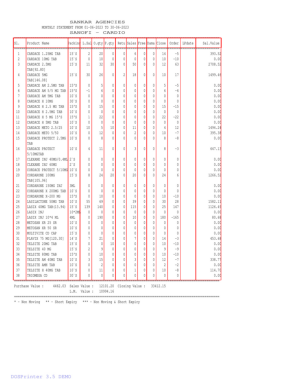

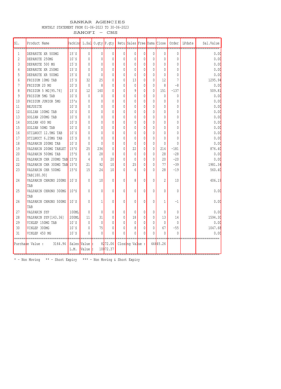

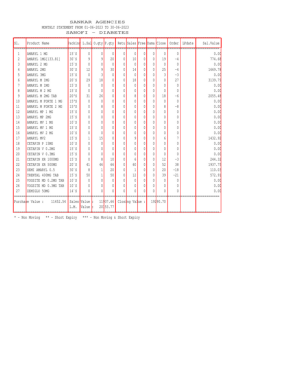

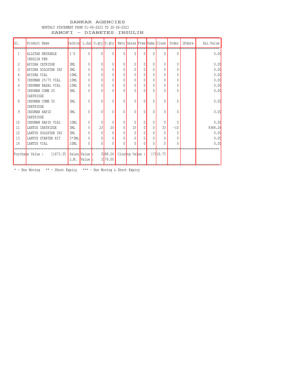

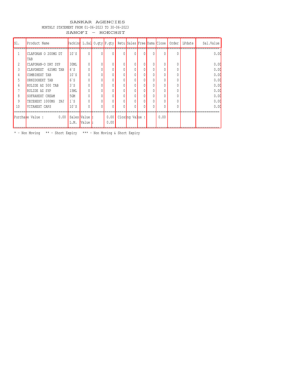

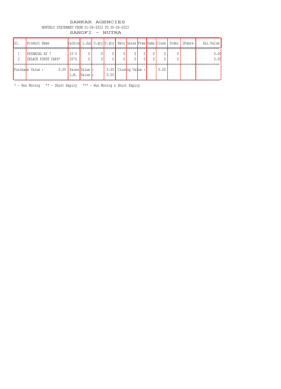

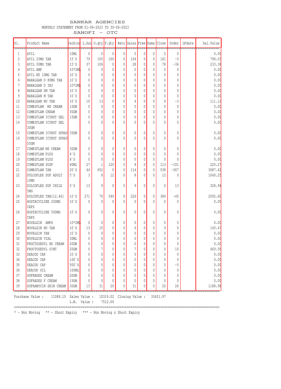

In [12]:
# visulaise the images with bboxes using parsed annotations
for image_path, parsed_annotations in zip(image_paths[23:30], parsed_annotations_list[23:30]):

    # load the image
    image = cv2.imread(image_path)

     # Draw bounding boxes on the image
    image_with_boxes = draw_bounding_boxes(image=image, annotations=parsed_annotations)

     # Display the image with bounding boxes using Matplotlib
    plt.imshow(image_with_boxes)
    plt.axis('off')
    plt.show()

After checking multiple sets of images and annotations. I confirm that we have correct labels. Now we go modular.

- However the YOLO model has been trained in google colab notebook to utilize a more powerfull GPU than my local machine. Visit this [notebook](https://colab.research.google.com/drive/1QS6iAZiYxp9I5vXJgMOssIApxZc2F7_F#scrollTo=zLdb8QEq7qw1) to view the training script.
- The images and labels have been split into three sets -train, val and test and kept in the 'training_data' directory.
- Now we go modular
